### Environment Set-Up

#### Conda Environment
- **Environment Name:** `7lds`
- **Python Version:** 3.9 (chosen for compatibility with specific package versions)

#### notes:
- export PATH="/Users/Lisa/Desktop/7l challenge/google-cloud-sdk/bin:$PATH"
- gcloud init



In [3]:
%load_ext google.cloud.bigquery

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 14 years ago. So if today is 2023.10.27 then the weather we want to forecast is for the date 2009.10.28. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

notes: historical trend analysis

In [4]:
%env GOOGLE_CLOUD_PROJECT=ds-7l-challenge-494


env: GOOGLE_CLOUD_PROJECT=ds-7l-challenge-494


In [5]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39800,99999,1929,12,11,45.500000,4,43.500000,4,981.400024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,37770,99999,1929,12,6,47.000000,4,41.299999,4,993.099976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,31590,99999,1929,12,6,45.799999,4,38.299999,4,974.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,30910,99999,1929,11,25,49.799999,4,NaN,<NA>,986.500000,...,NaN,<NA>,0.04,NaN,False,False,False,False,False,False
4,33790,99999,1929,8,29,62.000000,4,56.299999,4,1015.599976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,38110,99999,1929,11,2,47.799999,4,44.000000,4,1027.900024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,33790,99999,1929,9,17,55.700001,4,52.799999,4,1021.799988,...,NaN,<NA>,0.00,NaN,True,True,True,True,True,True
7,30750,99999,1929,12,7,43.299999,4,41.799999,4,966.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
8,34970,99999,1929,8,26,62.599998,4,56.000000,4,1023.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
9,37770,99999,1929,12,19,36.000000,4,28.799999,4,1033.099976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [6]:
%%bigquery df
SELECT 
    *, 
    DATE(year, month, day) AS formatted_date
FROM 
    `bigquery-public-data.samples.gsod`
WHERE 
    year BETWEEN 2005 AND 2009
    AND station_number BETWEEN 725300 AND 726300


Query is running:   0%|          |

Downloading:   0%|          |

sources used: https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

### Overview of the dataset

In [7]:
df= df[df['station_number'].between(725300, 725330)]

# Print the head of the filtered DataFrame
print(df.head())

    station_number  wban_number  year  month  day  mean_temp  \
60          725314        99999  2005      8   31  72.099998   
66          725317        99999  2005      4   25  49.799999   
85          725327        99999  2005      7    8  72.599998   
95          725317        99999  2005     10   31  53.200001   
99          725314        99999  2005      7    8  76.500000   

    num_mean_temp_samples  mean_dew_point  num_mean_dew_point_samples  \
60                     22       62.799999                          22   
66                     22       31.900000                          22   
85                     23       57.000000                          23   
95                     23       45.000000                          23   
99                     23       65.699997                          23   

    mean_sealevel_pressure  ...  min_temperature_explicit  \
60             1010.500000  ...                      <NA>   
66             1005.599976  ...                      <

In [8]:
print(df.shape)
print(df.dtypes)

(18129, 32)
station_number                          Int64
wban_number                             Int64
year                                    Int64
month                                   Int64
day                                     Int64
mean_temp                             float64
num_mean_temp_samples                   Int64
mean_dew_point                        float64
num_mean_dew_point_samples              Int64
mean_sealevel_pressure                float64
num_mean_sealevel_pressure_samples      Int64
mean_station_pressure                 float64
num_mean_station_pressure_samples       Int64
mean_visibility                       float64
num_mean_visibility_samples             Int64
mean_wind_speed                       float64
num_mean_wind_speed_samples             Int64
max_sustained_wind_speed              float64
max_gust_wind_speed                   float64
max_temperature                       float64
max_temperature_explicit              boolean
min_temperature       

In [9]:
df.describe(include='all')

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,formatted_date
count,18129.0,18129.0,18129.0,18129.0,18129.0,18129.000000,18129.0,18127.000000,18127.0,16291.000000,...,0,17938.000000,565.000000,18129,18129,18129,18129,18129,18129,18129
unique,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,...,0,NaN,NaN,2,2,2,2,2,2,1824
top,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,2005-08-31
freq,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,...,NaN,NaN,NaN,15987,15987,15987,15987,15987,15987,10
mean,725316.96205,72766.474488,2007.001103,6.527884,15.721,51.999636,23.574163,41.605108,23.553704,1016.937585,...,NaN,0.095488,2.865133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.979529,39561.090384,1.413667,3.451484,8.803705,19.392603,1.81723,18.494937,1.857548,6.920370,...,NaN,0.279290,2.105886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,725300.0,3887.0,2005.0,1.0,1.0,-16.200001,4.0,-23.500000,4.0,985.299988,...,NaN,0.000000,1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,725314.0,14842.0,2006.0,4.0,8.0,36.299999,24.0,27.500000,24.0,1012.799988,...,NaN,0.000000,1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,725316.0,99999.0,2007.0,7.0,16.0,53.799999,24.0,42.599998,24.0,1016.700012,...,NaN,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,725326.0,99999.0,2008.0,10.0,23.0,69.099998,24.0,57.200001,24.0,1020.900024,...,NaN,0.040000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After a general overview, it has been noted that there are missing values, which necessitate appropriate handling strategies for reliable data analysis.

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

### Missing Data

This section is devoted to examination of missing values. Lets see a percentage of missing data to the dataset length.

In [10]:
# sum of missing values
missing_values_sum = df.isnull().sum()
missing_values_sum = missing_values_sum[missing_values_sum > 0]
# length of the dataframe
total_rows = len(df)

# the percentage of missing data for each column
missing_percentage = (missing_values_sum / total_rows) * 100

print(missing_percentage)

mean_dew_point                          0.011032
num_mean_dew_point_samples              0.011032
mean_sealevel_pressure                 10.138452
num_mean_sealevel_pressure_samples     10.138452
mean_station_pressure                  94.522588
num_mean_station_pressure_samples      94.522588
mean_visibility                         0.016548
num_mean_visibility_samples             0.016548
mean_wind_speed                         0.027580
num_mean_wind_speed_samples             0.027580
max_sustained_wind_speed                0.055160
max_gust_wind_speed                    36.742236
max_temperature                         0.011032
max_temperature_explicit                0.011032
min_temperature                       100.000000
min_temperature_explicit              100.000000
total_precipitation                     1.053561
snow_depth                             96.883446
dtype: float64


To address missingness in this meteorological dataset effectively, lets categorize the missing data into three groups based on their extent: 

1. **Large Missingness (Over 50%):** When a feature has more than half of its data missing, it's considered to have large missingness. Such a significant absence of data can lead to several issues in the analysis, including reduced statistical power, biased estimations, and potentially misleading conclusions. Therefore, our approach is to remove these features entirely from our dataset.

2. **Small to Moderate Missingness (More than 0% to 50%):** Features with missing data ranging between more than 0% and 50% are classified as having small to moderate missingness. For these, the strategy is to use imputation to fill in the missing values. The choice between mean and median imputation is based on the distribution of each feature. If a feature is normally distributed, we will use mean imputation. For skewed distributions, median imputation is more appropriate, as it is less affected by outliers.

Of course, there are different (MCAR, MAR, MNAR) missingness concepts which could help finding a better handling way but due to time constraints lets stay at the most simple ones.

In [11]:
# dropping columns with more than 50% missing values
threshold_for_dropping = 50 # in percentage
columns_dropped = []
for col in df.columns:
    missing_percentage = df[col].isnull().mean() * 100
    if missing_percentage > threshold_for_dropping:
        df.drop(col, axis=1, inplace=True)
        columns_dropped.append(col)

print(f"Dropped columns due to high missing percentage: {columns_dropped}")

# imputing remaining columns with less than 50% missing values
for col in df.columns:
    missing_percentage = df[col].isnull().mean() * 100
    if 0 < missing_percentage <= threshold_for_dropping:
        if df[col].dtype == 'boolean':
            # impute boolean columns with mode
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Imputed missing values in boolean column '{col}' using mode value '{mode_value}'.")
        else:
            # checking distribution for non-boolean columns
            is_skewed = df[col].skew() > 1 or df[col].skew() < -1

            # imputing missing values
            if is_skewed:
                # median imputation for skewed data
                df[col].fillna(df[col].median(), inplace=True)
                print(f"Imputed missing values in '{col}' using median.")
            else:
                # mean imputation for normally distributed data
                df[col].fillna(df[col].mean(), inplace=True)
                print(f"Imputed missing values in '{col}' using mean.")


Dropped columns due to high missing percentage: ['mean_station_pressure', 'num_mean_station_pressure_samples', 'min_temperature', 'min_temperature_explicit', 'snow_depth']
Imputed missing values in 'mean_dew_point' using mean.
Imputed missing values in 'num_mean_dew_point_samples' using median.
Imputed missing values in 'mean_sealevel_pressure' using mean.
Imputed missing values in 'num_mean_sealevel_pressure_samples' using median.
Imputed missing values in 'mean_visibility' using median.
Imputed missing values in 'num_mean_visibility_samples' using median.
Imputed missing values in 'mean_wind_speed' using mean.
Imputed missing values in 'num_mean_wind_speed_samples' using median.
Imputed missing values in 'max_sustained_wind_speed' using mean.
Imputed missing values in 'max_gust_wind_speed' using median.
Imputed missing values in 'max_temperature' using mean.
Imputed missing values in boolean column 'max_temperature_explicit' using mode value 'False'.
Imputed missing values in 'total_

In [12]:
print(df.shape)

(18129, 27)


In [13]:
# change all boolean columns to int for easier processing
for col in df.columns:
    if df[col].dtype == 'boolean':
        df[col] = df[col].astype(int)


print(df.dtypes)


station_number                          Int64
wban_number                             Int64
year                                    Int64
month                                   Int64
day                                     Int64
mean_temp                             float64
num_mean_temp_samples                   Int64
mean_dew_point                        float64
num_mean_dew_point_samples              Int64
mean_sealevel_pressure                float64
num_mean_sealevel_pressure_samples      Int64
mean_visibility                       float64
num_mean_visibility_samples             Int64
mean_wind_speed                       float64
num_mean_wind_speed_samples             Int64
max_sustained_wind_speed              float64
max_gust_wind_speed                   float64
max_temperature                       float64
max_temperature_explicit                int64
total_precipitation                   float64
fog                                     int64
rain                              

sources used: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/#:~:text=Missing%20data%20present%20various%20problems,in%20the%20estimation%20of%20parameters

https://www.researchgate.net/publication/360174018_Comparison_of_five_imputation_methods_in_handling_missing_data_in_a_continuous_frequency_table

In [14]:
# saving the DataFrame as a CSV file for a convinience
df.to_csv('weather_data.csv', index=False)


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [15]:
import datetime as dt

# lets image we are 14 years in the past
todays_date = str(dt.datetime.today()- dt.timedelta(days=14*365)).split(' ')[0] 
tomorrows_date = str(dt.datetime.today()- dt.timedelta(days=14*365 - 1)).split(' ')[0] 


We have time series data, so the sequential order of dates should not be lost. 
Lets follow the common split into train/val/test 70/20/10

In [16]:
# actually i do the same in the training loop
df = df.sort_values(by='formatted_date')
# ensure all columns are numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df.drop(col, axis=1, inplace=True)

# calculate the indices for splitting
total_rows = len(df)
train_end_idx = int(total_rows * 0.70)
val_end_idx = train_end_idx + int(total_rows * 0.20)

# split the data
train_df = df.iloc[:train_end_idx]
validation_df = df.iloc[train_end_idx:val_end_idx]
test_df = df.iloc[val_end_idx:]

print("Training Set Shape:", train_df.shape)
print("Validation Set Shape:", validation_df.shape)
print("Test Set Shape:", test_df.shape)





Training Set Shape: (12690, 27)
Validation Set Shape: (3625, 27)
Test Set Shape: (1814, 27)


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [17]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=14*365)).split(' ')[0]

'2009-11-13'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

### Model Training

Will it snow tomorrow? - the question is typical for a binary classification with a yes/no, 1/0 answer.
Easy Logistic Regression would be a straight forward solution but lets 

### Training of XGBoost and Validation

In [18]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# load df
df = pd.read_csv('weather_data.csv')

# sort the dataframe by date
df.sort_values('formatted_date', inplace=True)

# add a feature for the previous day's temperature
df['prev_day_temp'] = df.groupby('station_number')['mean_temp'].shift(1)

# drop rows with NaN values, which were created by shifting
df.dropna(subset=['prev_day_temp'], inplace=True)

# define features and target variables; drop 'formatted_date' if it's not a feature
features = df.drop(['snow', 'formatted_date'], axis=1)
target = df['snow']

# exclude the specific date from the dataset for training
specific_date = tomorrows_date
df_excluded = df[df['formatted_date'] != specific_date]

# calculate indices for train, validation, and test split
train_end_idx = int(len(df_excluded) * 0.7)
val_end_idx = train_end_idx + int(len(df_excluded) * 0.2)

# create train, validation, and test sets using the indices
# train set is the oldest data, the validation set is the next oldest data, and the test set is the newest data
X_train, y_train = features.iloc[:train_end_idx], target.iloc[:train_end_idx]
X_val, y_val = features.iloc[train_end_idx:val_end_idx], target.iloc[train_end_idx:val_end_idx]
X_test, y_test = features.iloc[val_end_idx:], target.iloc[val_end_idx:]

# initialize XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# trainining the model
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10)

# evaluation of the model
y_val_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(classification_report(y_val, y_val_pred))


[0]	validation_0-logloss:0.18951
[1]	validation_0-logloss:0.13231
[2]	validation_0-logloss:0.09460
[3]	validation_0-logloss:0.06847
[4]	validation_0-logloss:0.04993
[5]	validation_0-logloss:0.03660
[6]	validation_0-logloss:0.02692
[7]	validation_0-logloss:0.01985
[8]	validation_0-logloss:0.01468
[9]	validation_0-logloss:0.01087
[10]	validation_0-logloss:0.00806
[11]	validation_0-logloss:0.00599
[12]	validation_0-logloss:0.00447
[13]	validation_0-logloss:0.00334
[14]	validation_0-logloss:0.00250
[15]	validation_0-logloss:0.00188
[16]	validation_0-logloss:0.00142
[17]	validation_0-logloss:0.00108
[18]	validation_0-logloss:0.00083
[19]	validation_0-logloss:0.00064
[20]	validation_0-logloss:0.00050
[21]	validation_0-logloss:0.00040
[22]	validation_0-logloss:0.00032
[23]	validation_0-logloss:0.00026
[24]	validation_0-logloss:0.00021
[25]	validation_0-logloss:0.00018
[26]	validation_0-logloss:0.00017
[27]	validation_0-logloss:0.00016
[28]	validation_0-logloss:0.00015
[29]	validation_0-loglos

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Validation Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3287
           1       1.00      1.00      1.00       334

    accuracy                           1.00      3621
   macro avg       1.00      1.00      1.00      3621
weighted avg       1.00      1.00      1.00      3621



### Testing

In [19]:
# Prepare the data for the specific date
df_specific_date = df[df['formatted_date'] == specific_date]
X_specific_date = df_specific_date[features.columns]

# Make predictions for the specific date
predictions = model.predict(X_specific_date)

# Output predictions for each station
predictions_df = df_specific_date[['station_number']].copy()
predictions_df['snow_prediction'] = predictions
predictions_df['actual_snow'] = df_specific_date['snow']

# Display predictions
print(predictions_df)


       station_number  snow_prediction  actual_snow
13189          725316                0            0
8006           725327                0            0
14888          725330                0            0
7725           725300                0            0
13828          725315                0            0
8148           725314                0            0
11256          725305                0            0
15330          725326                0            0
16684          725317                0            0
1277           725320                0            0


In [20]:
print(f"{predictions_df['snow_prediction'].value_counts()} Snow prediction = 0. It won't snow tomorrow.")


snow_prediction
0    10
Name: count, dtype: int64 Snow prediction = 0. It won't snow tomorrow.


In [21]:
confusion_matrix = pd.crosstab(predictions_df['snow_prediction'], predictions_df['actual_snow'], rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Actual      0
Predicted    
0          10


In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1_score}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


the metrics are unrealistics in the real world scenario

XAI Playground

In [23]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)


[11:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


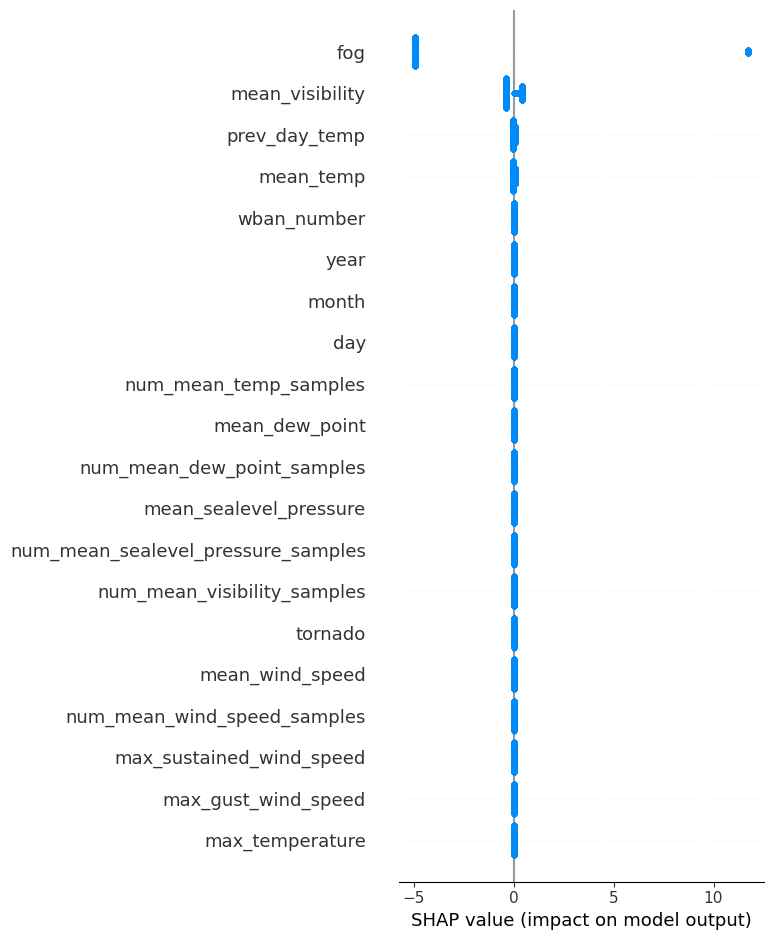

In [26]:
# plot 
features = df.drop(['snow', 'formatted_date'], axis=1)

feature_names = [str(name) for name in features]

shap.summary_plot(shap_values, feature_names=feature_names, show=True)
